In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# LOAD DF

In [3]:
new_df_with_vaccine_reaction = pd.read_csv('new_df_with_vaccine_reaction.csv', encoding='utf-8').drop(columns=['Unnamed: 0'])

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def corr_heatmap(data_frame, size):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()


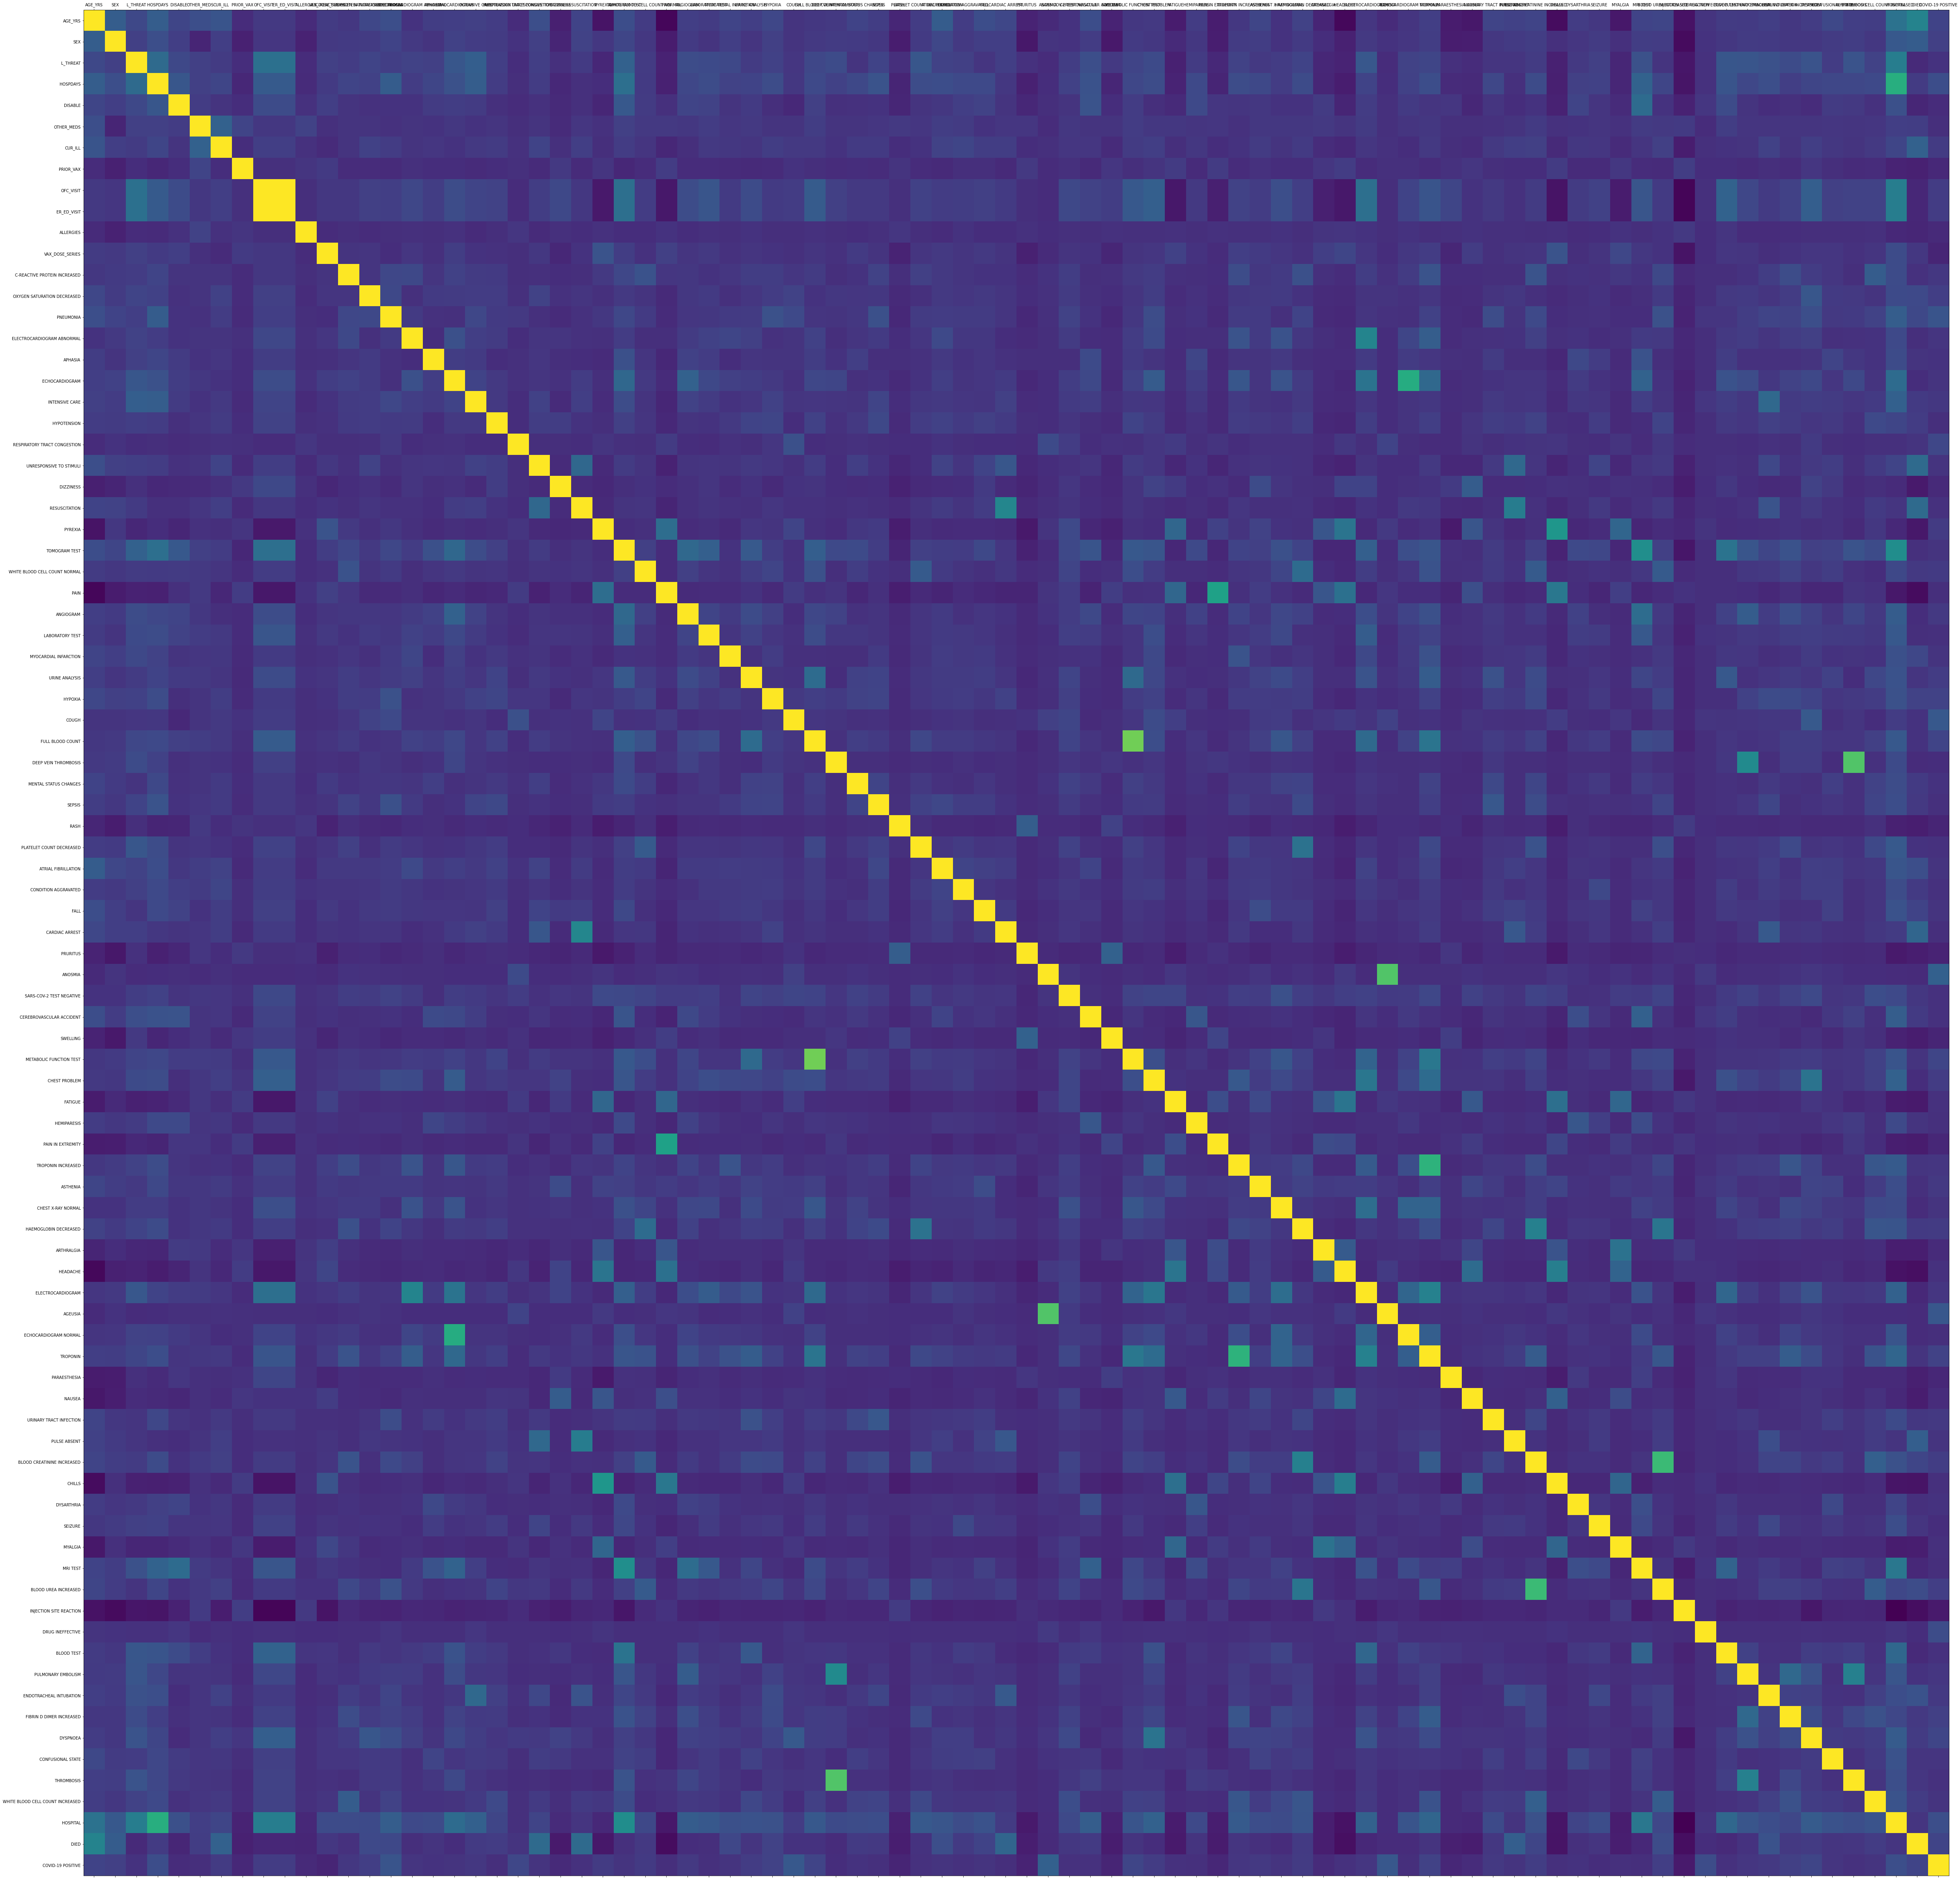

In [5]:
corr_heatmap(new_df_with_vaccine_reaction ,87)

# SPLIT X AND Y VALUES FOR MEDICAL HISTORIES (HOSPITAL)

In [5]:
clm = new_df_with_vaccine_reaction.columns
feature_column_names = clm[:-3]

predicted_class_name = ['HOSPITAL']

X = new_df_with_vaccine_reaction[feature_column_names].values
y = new_df_with_vaccine_reaction[predicted_class_name].values



# SMOTING 

In [6]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
X, y = sm.fit_resample(X, y) 


# SPLIT THE TRAIN AND TEST DATA

In [7]:
split_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format(len(X_train)/(len(X_train)+len(X_test)) * 100))
print("{0:0.2f}% in test set".format(len(X_test)/(len(X_train)+len(X_test)) * 100))



80.00% in training set
20.00% in test set


# STANDARD SCALLING

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# APPLY DEEP LEARNING

In [17]:
pip3 show tensorflow

SyntaxError: invalid syntax (<ipython-input-17-76eab10d50ab>, line 1)

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

ModuleNotFoundError: No module named 'tensorflow'

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=1)
test_loss, test_acc = model.evaluate(X_test, y_test)

NameError: name 'model' is not defined